In [1]:
import h5py
# from ipywidgets import interact
import xrayutilities_id01_functions as id01
import xrayutilities as xu
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'

/home/edoardo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
d = '../h5_files/'
!ls {d} | grep h5

20161115_E16018.h5
20161115_E16019.h5
20161115_E16020.h5
20161115_E16088.h5
20161115_E16095.h5
20161117_E16014.h5
20161117_E16018.h5
20161117_E16095.h5


In [3]:
fname = '20161117_E16014.h5'
f = h5py.File(d+fname)
f.keys()

[u'scan_0001', u'scan_0002', u'scan_0003', u'scan_0004', u'scan_0005']

In [4]:
scan_no = 4
h5file = d + fname

nx, ny, nz = 400,400,400

qx, qy, qz, gint, gridder = id01.gridmap(h5file, scan_no, nx, ny, nz, angdelta=[0,135,0,0])

QX, QY, QZ = np.mgrid[qx.min():qx.max():1j*nx,
                     qy.min():qy.max():1j*ny,
                     qz.min():qz.max():1j*nz]

INT = xu.maplog(gint, 4.5, 0)

['del', 'eta', 'H', 'K', 'L', 'Epoch', 'Seconds', 'bv1', 'opt1', 'opt2', 'bv2', 'att2', 'bv3', 'bv4', 'exp2', 'Srcur', 'roi1', 'roi2', 'roi3', 'roi4', 'roi5', 'mpx4ro1', 'mpx4ro2', 'mpx4inr', 'exp1', 'mpx4int']
None
None
['eta', 'del']


**axis 0 is qyqz, axis 1 is qxqz**

In [4]:
plt.contourf(QY[0,:,:],QZ[0,:,:],INT.sum(axis=0),40)
plt.axis([QY[0,:,:].min(),QY[0,:,:].max(),QZ[0,:,:].min(),QZ[0,:,:].max()])
plt.xlabel(r'$Q_y$',{'fontsize': 20})
plt.ylabel(r'$Q_z$',{'fontsize': 20})
matplotlib.rcParams.update({'font.size': 13})
# plt.savefig('img/' + fname[9:15] + '_s' + str(scan_no) +'_yz.png',dpi=300)
plt.axes().set_aspect('equal')

NameError: name 'QY' is not defined

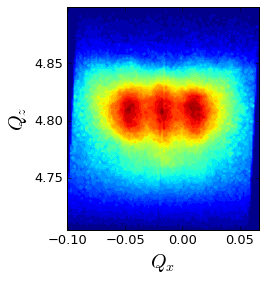

In [6]:
plt.contourf(QX[:,0,:],QZ[:,0,:],INT.sum(axis=1),40)
plt.axis([QX[:,0,:].min(),QX[:,0,:].max(),QZ[0,:,:].min(),QZ[0,:,:].max()])
plt.xlabel(r'$Q_x$',{'fontsize': 20})
plt.ylabel(r'$Q_z$',{'fontsize': 20})
matplotlib.rcParams.update({'font.size': 13})
# plt.savefig('img/' + fname[9:15] + '_s' + str(scan_no) +'_xz.png',dpi=300)
plt.axes().set_aspect('equal')

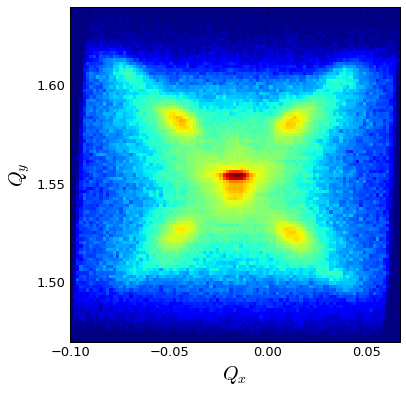

In [7]:
fig = plt.figure(figsize=(6,6))
# plt.contourf(QX[:,:,0],QY[:,:,0],INT.sum(axis=2),40)
plt.contourf(QX[:,:,0],QY[:,:,0],INT.sum(axis=2),40)
plt.axis([QX[:,0,:].min(),QX[:,0,:].max(),QY[:,:,0].min(),QY[:,:,0].max()]);
plt.xlabel(r'$Q_x$',{'fontsize': 20})
plt.ylabel(r'$Q_y$',{'fontsize': 20})
matplotlib.rcParams.update({'font.size': 13})
plt.axes().set_aspect('equal')
plt.savefig('img/' + fname[9:15] + '_s' + str(scan_no) +'_xy.png',dpi=300)

In [47]:
mlab.figure()
mlab.contour3d(QX, QY, QZ, INT, contours=10, opacity=.2)
# mlab.colorbar() makes it crash!
mlab.axes(nb_labels=5, xlabel='Qx', ylabel='Qy', zlabel='Qz')
mlab.title('SCAN:%i'%scan_no, size=0.5, height=0.9)
mlab.show()